# Django 09 Authentication System 02

## 회원 가입

User 객체를 Create 하는 과정

### UserCreationForm()
회원 가입시 사용자 입력 데이터를 받는 'built-in ModelForm'

### 회원 가입 페이지 작성
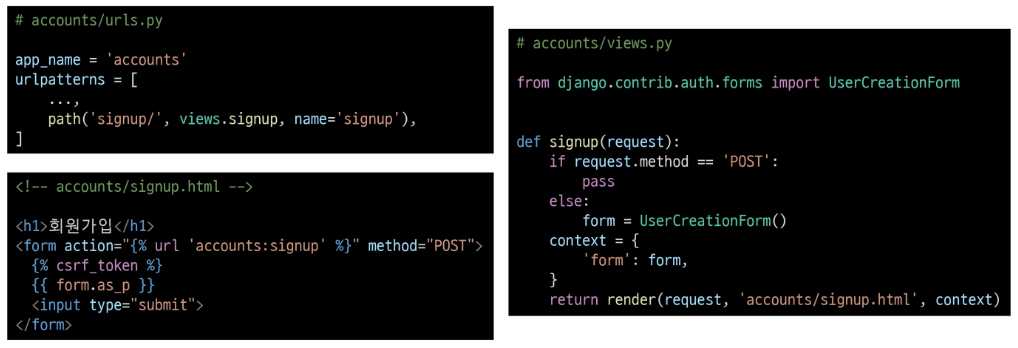

- 회원 가입 페이지 확인
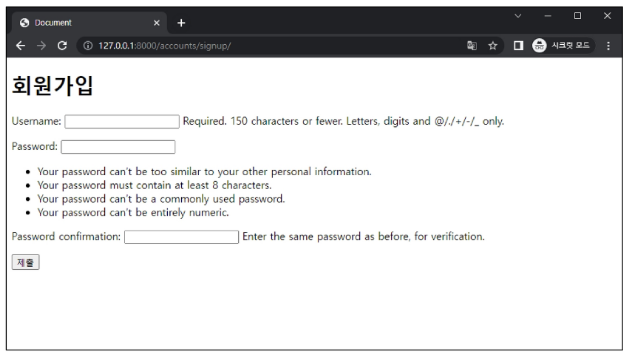

### 회원 가입 로직 작성
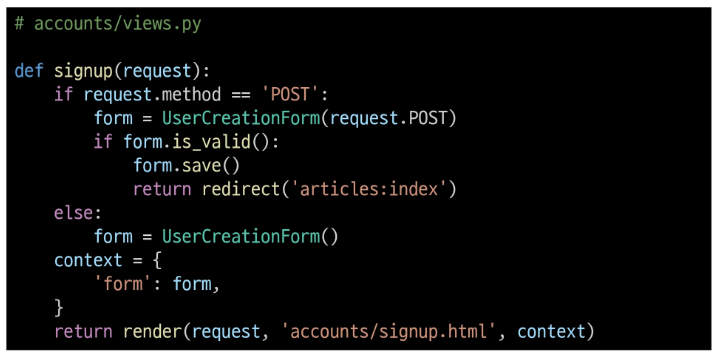

### 회원 가입 로직 에러
- 회원가입 시도 후 에러 페이지 확인
- -> Manager isn't available; 'auth.User' has been swapped for 'accounts.User'

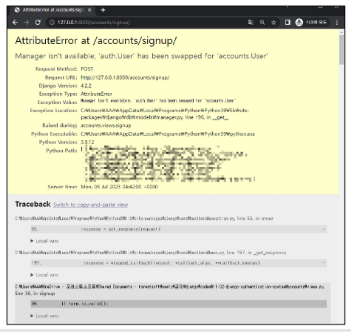

- 회원가입에 사용하는 UserCreationForm이 대체한 커스텀 유저 모델이 아닌 과거 Django의 기본 유저 모델로 인해 작성된 클래스이기 때문

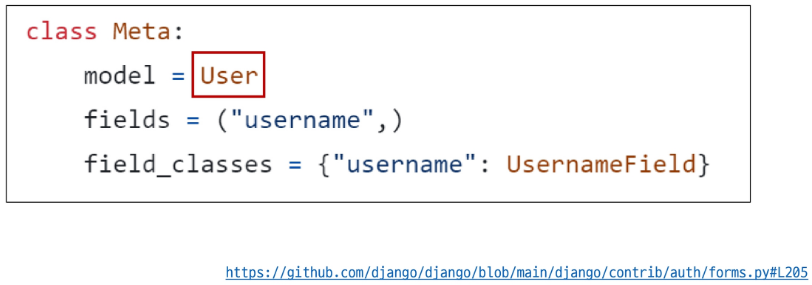

### 커스텀 유저 모델을 사용하려면 다시 작성해야하는 Form
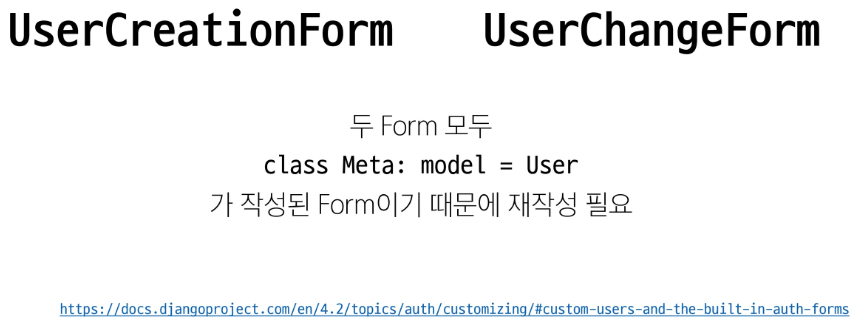

### UserCreationForm과 UserChangeForm 커스텀
- Custom User model을 사용할 수 있도록 상속 후 일부분만 재작성

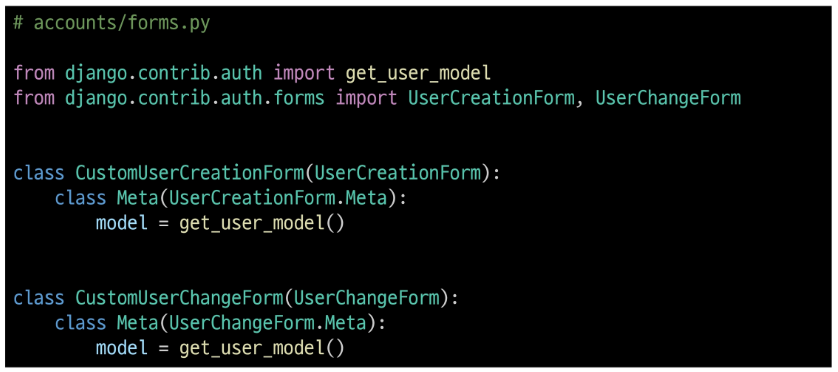

### get_user_model()
'현재 프로젝트에서 활성화된 사용자 모델(active user model)' 을 반환하는 함수

### User 모델을 직접 참조하지 않는 이유
- get_user_model()을 사용해 User 모델을 참조하면 커스텀 User 모델을 자동으로 반환해주기 때문
- Django는 필수적으로 User 클래스를 참조하는 대신 get_user_model()을 사용해 참조해야 한다고 강조하고 있음
- -> User model 참조에 대한 자세한 내용은 추후 모델 관계에서 다룰 예정

### 회원 가입 로직 완성
- CustomUserCreationForm으로 변경

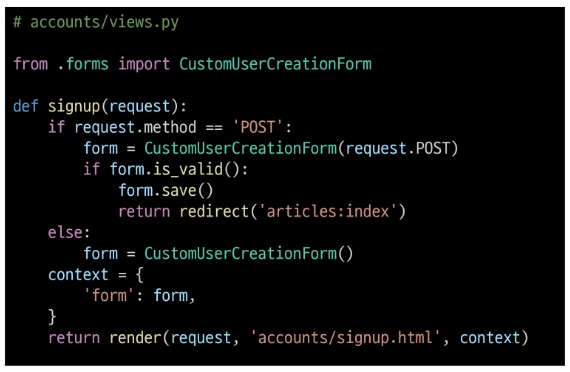

## 회원 탈퇴

User 객체를 Delete 하는 과정

### 회원 탈퇴 로직 작성
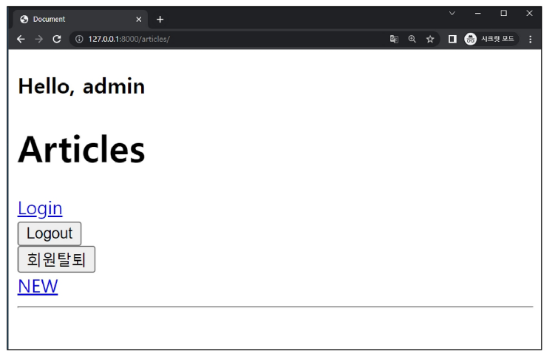

- 회원 탈퇴 진행

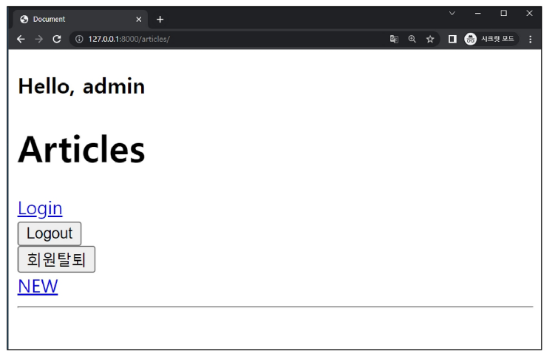

## 회원정보 수정

User 객체를 Update 하는 과정

### UserChangeForm()
회원정보 수정 시 사용자 입력 데이터를 받는 built-in ModelForm

### 회원정보 수정 페이지 작성
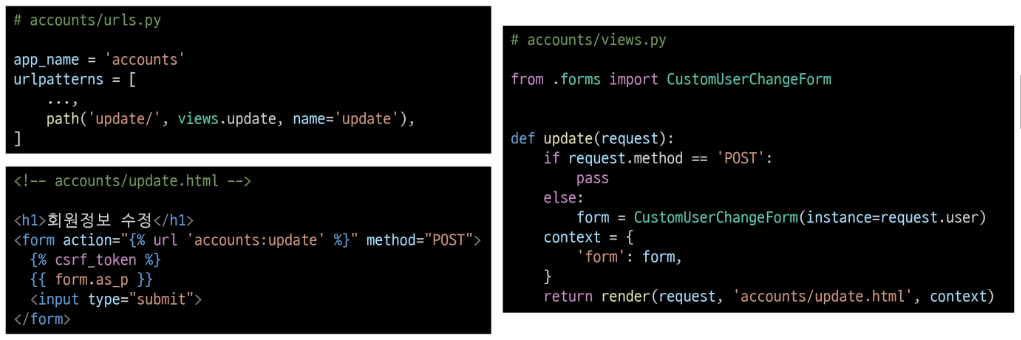

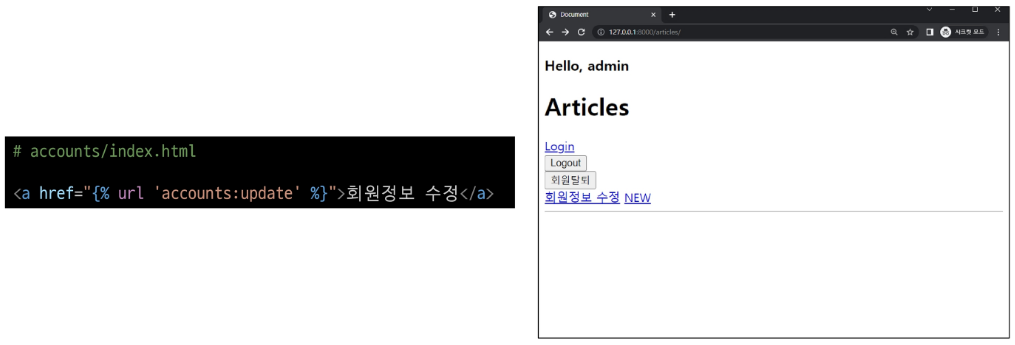

- 회원정보 수정 페이지 확인
- 
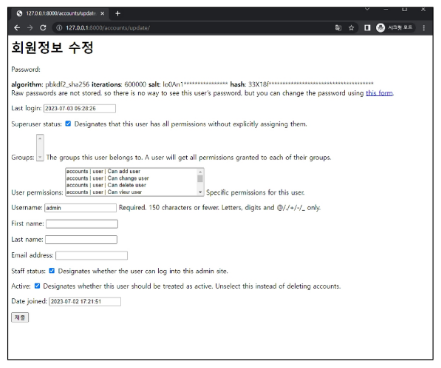

### UserChangeForm 사용 시 문제점
- User 모델의 모든 정보들(fields)까지 모두 출력됨
- 일반 사용자들이 접근해서는 안되는 정보는 출력하지 않도록 해야함

- -> CustomUserChangeForm에서 출력 필드를 다시 조정하기

### CustomUserChnageForm 출력 필드 재정의
- User Model의 필드 목록 확인

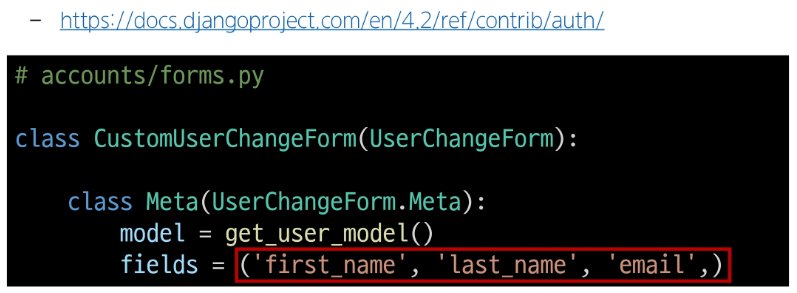

- 회원정보 수정 페이지 확인

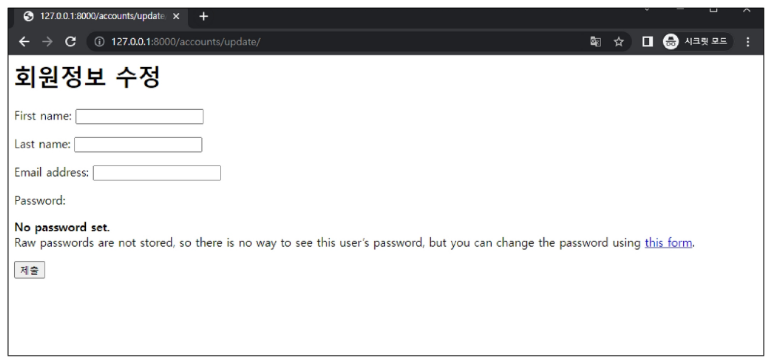

### 회원정보 수정 로직 완성
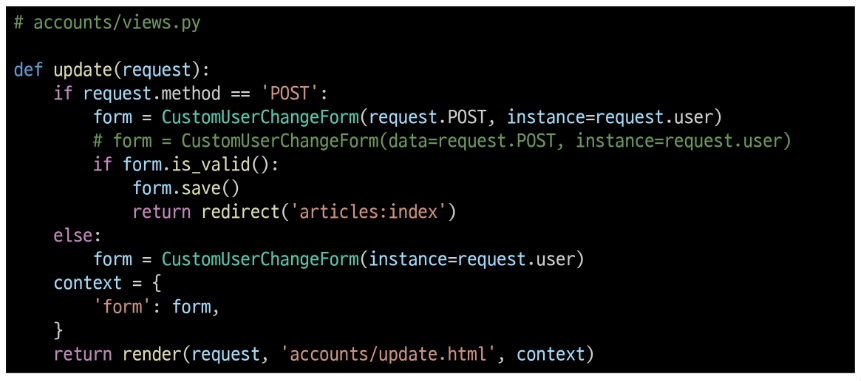

## 비밀번호 변경

인증된 사용자의 Session 데이터를 Update 하는 과정

### PasswordChangeForm()
비밀번호 변경 시 사용자 입력 데이터를 받는 built-in Form

### 비밀번호 변경 페이지 작성
django는 비밀번호 변경 페이지를 회원정보 수정 form 하단에서 별도 주소로 안내
-> /user_pk/password/

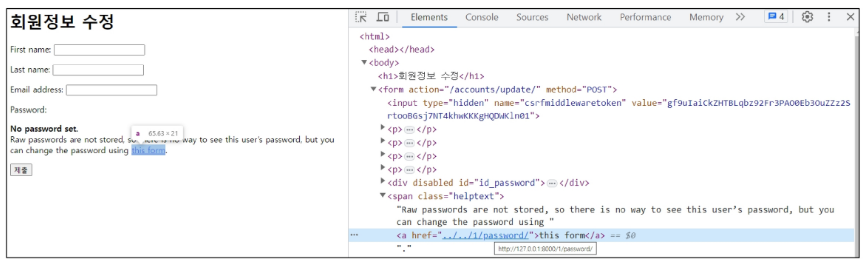

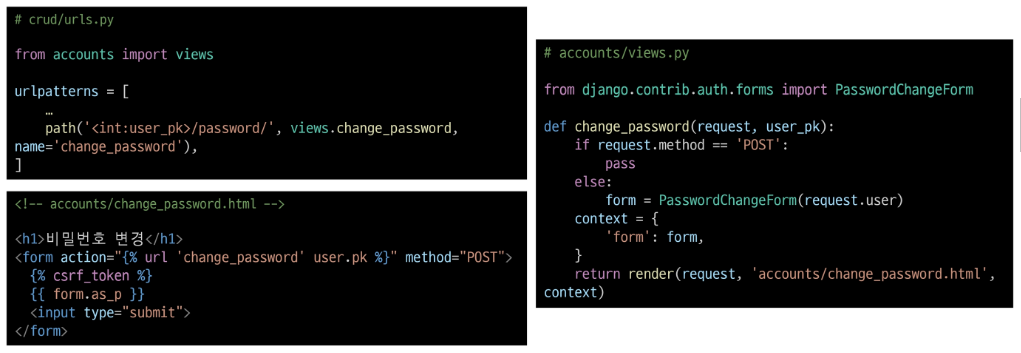

- 비밀번호 변경 페이지 확인

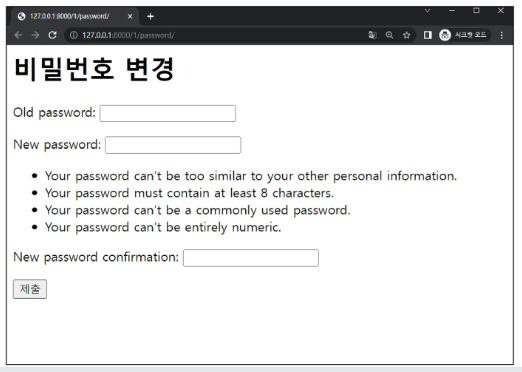

### 비밀번호 변경 로직 완성
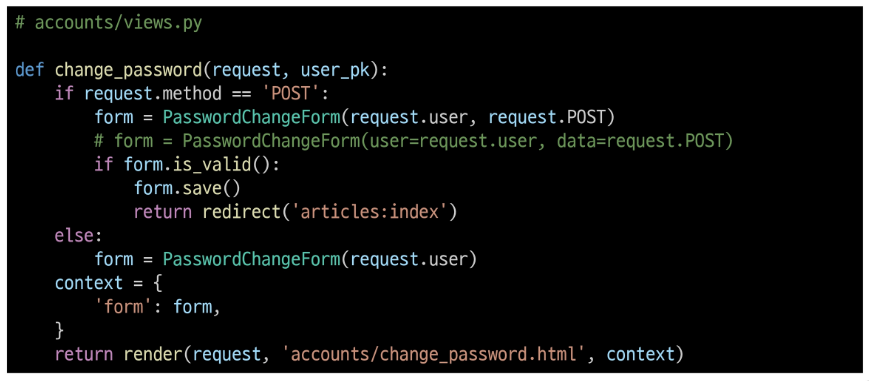

### 세션 무효화 방지

#### 암호 변경 시 세션 무효화
- 비밀번호가 변경되면 기존 세션과 회원 인증 정보가 일치하지 않게 되어 버려 로그인 상태가 유지되지 못하고 로그아웃 처리됨
- 비밀번호가 변경되면서 기존 세션과의 회원 인증 정보가 일치하지 않기 때문

### update_session_auth_hash(request, user)
암호 변경 시 세션 무효화를 막아주는 함수

-> 암호가 변경되면 새로운 password의 Session Data로 기존 session을 자동으로 갱신

### update_session_auth_hash 적용
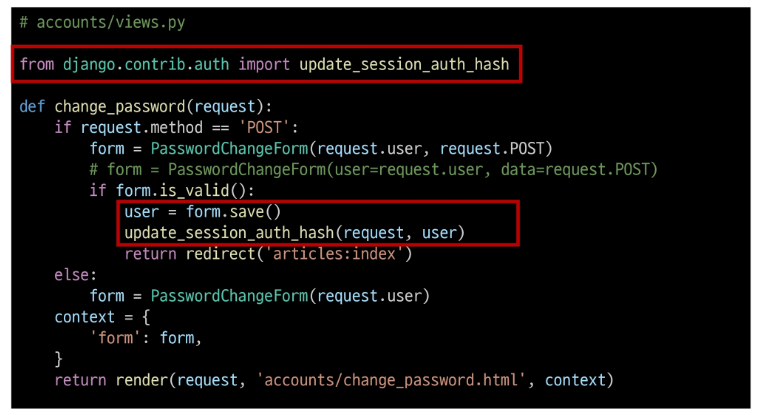

## 인증된 사용자에 대한 접근 제한

로그인 사용자에 대해 접근을 제한하는 2가지 방법
1. is_authenticated 속성
2. login_required 데코레이터

### is_authenticated 속성

#### is_authenticated
사용자가 인증 되었는지 여부를 알 수 있는 User model의 속성

- 모든 User 인스턴스에 대해 항상 True인 읽기 전용 속성
    - 비인증 사용자에 대해서는 항상 False

#### is_authenticated 적용하기
로그인과 비로그인 상태에서 화면에 출력되는 링크를 다르게 설정하기

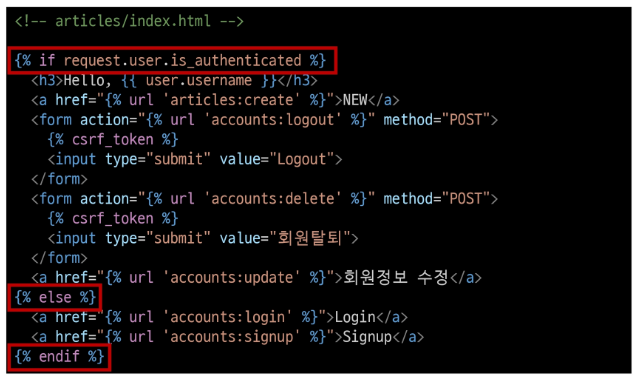

인증된 사용자라면 로그인/회원가입 로직을 수행할 수 없도록 하기

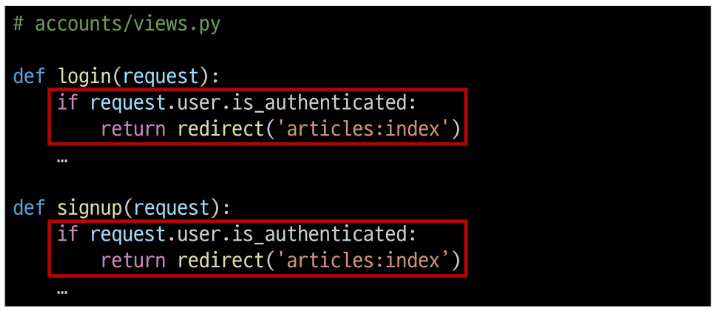

### login_required 데코레이터

#### login_required
인증된 사용자에 대해서만 view 함수를 실행시키는 데코레이터

-> 비인증 사용자의 경우 /accounts/login/ 주소로 redirect 시킴

#### login_required 적용하기
인증된 사용자만 게시글을 작성/수정/삭제 할 수 있도록 수정

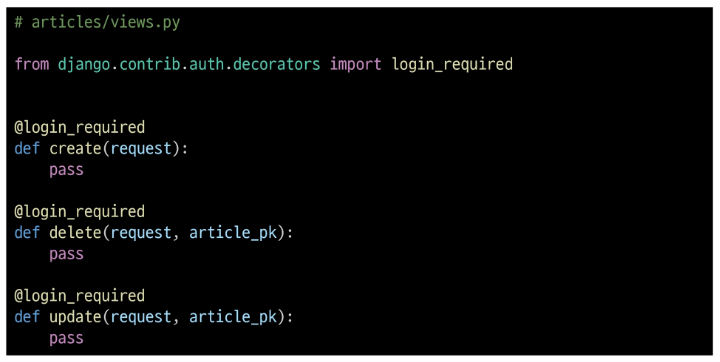

인증된 사용자만 로그아웃/탈퇴/수정/비밀번호 변경 할 수 있도록 수정

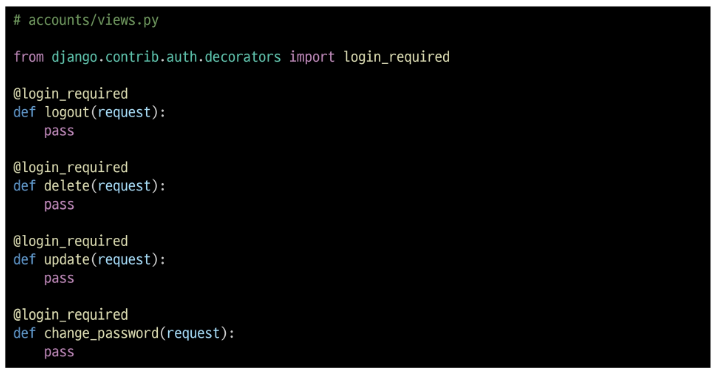

## +

### is_authenticated 코드

#### is_authenticated 속성 코드
- 메서드가 아닌 속성 값임을 주의

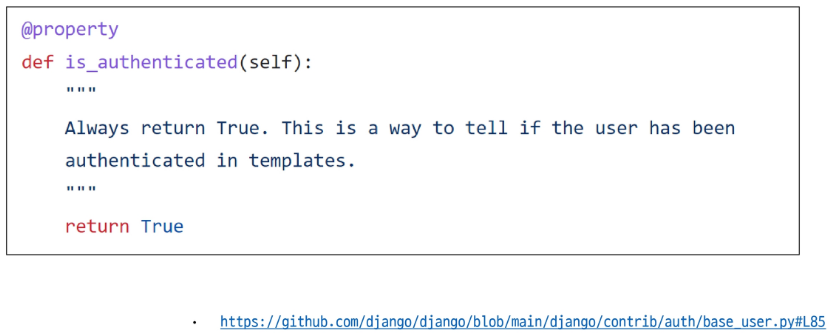

### 회원가입 후 자동 로그인

#### 회원가입 후 로그인까지 이어서 진행하려면?
- 회원가입 성공한 user 객체를 활용해 login 진행

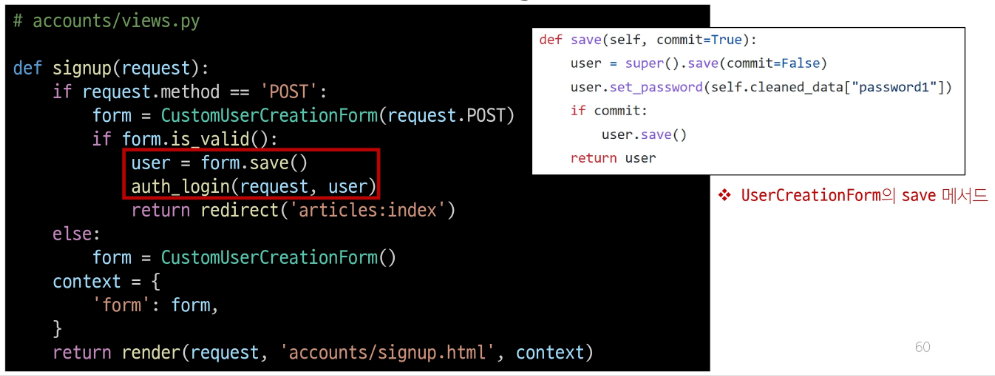

### 회원 탈퇴 개선

#### 탈퇴와 함께 기존 사용자의 Session Data 삭제 방법
- 사용자 객체 삭제 이후 로그아웃 함수 호출
- 단 `탈퇴(1) 후 로그아웃(2)`의 순서가 바뀌면 안됨
- 먼저 로그아웃이 진행되면 해당 요청 객체 정보가 없어지기 때문에 탈퇴에 필요한 유저 정보 또한 없어지기 때문

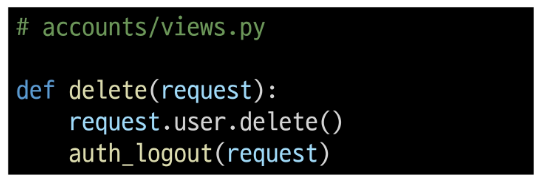

### PasswordChangeForm 인자 순서

#### PasswordChangeForm의 인자 순서
- PasswordChangeForm이 다른 Form과 달리 user 객체를 첫번째 인자로 받는 이유
- 부모 클래스인 SetPasswordForm의 생성자 함수 구성을 따르기 때문

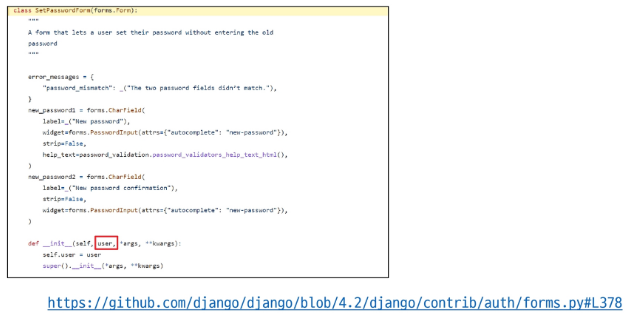

### Auth built-in form 코드

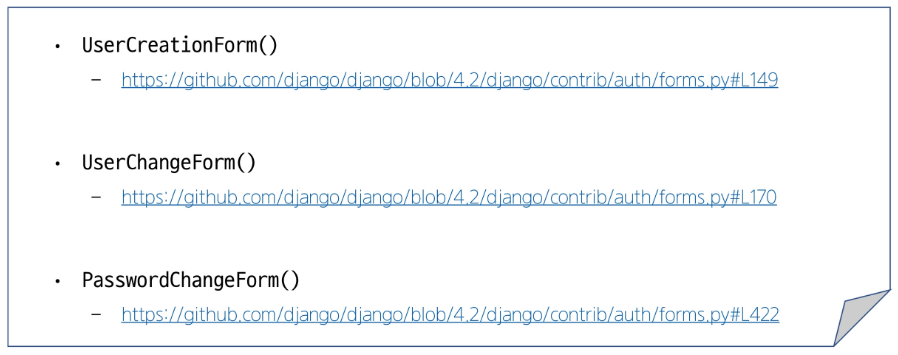